In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
from sklearn.datasets import load_iris
iris = load_iris()


In [3]:
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
X = data.drop('target', axis=1)  # Features (sepal length, sepal width, petal length, petal width)
y = data['target']  # Target variable (species)


In [10]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: target, Length: 150, dtype: float64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [5]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [12]:
X_train

array([[-0.4134164 , -1.46200287, -0.09951105, -0.32339776],
       [ 0.55122187, -0.50256349,  0.71770262,  0.35303182],
       [ 0.67180165,  0.21701605,  0.95119225,  0.75888956],
       [ 0.91296121, -0.02284379,  0.30909579,  0.2177459 ],
       [ 1.63643991,  1.41631528,  1.30142668,  1.70589097],
       [-0.17225683, -0.26270364,  0.19235097,  0.08245999],
       [ 2.11875905, -0.02284379,  1.59328871,  1.16474731],
       [-0.29283662, -0.02284379,  0.36746819,  0.35303182],
       [-0.89573553,  1.17645543, -1.44207638, -1.40568508],
       [ 2.23933883, -0.50256349,  1.65166111,  1.0294614 ],
       [-0.05167705, -0.74242333,  0.13397857, -0.32339776],
       [-0.77515575,  0.93659559, -1.44207638, -1.40568508],
       [-1.01631531,  1.17645543, -1.50044878, -1.27039917],
       [-0.89573553,  1.89603497, -1.15021435, -1.13511325],
       [-1.01631531, -2.42144225, -0.21625586, -0.32339776],
       [ 0.55122187, -0.74242333,  0.60095781,  0.75888956],
       [-1.25747488,  0.

In [13]:
y_train

81     1.0
133    2.0
137    2.0
75     1.0
109    2.0
      ... 
71     1.0
106    2.0
14     0.0
92     1.0
102    2.0
Name: target, Length: 105, dtype: float64

In [6]:
#kNeighbors Classifier
classifier = KNeighborsClassifier(n_neighbors=5)  # we can choose different values for k
classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [7]:
y_pred = classifier.predict(X_test)


In [14]:
y_pred

array([1., 0., 2., 1., 1., 0., 1., 2., 1., 1., 2., 0., 0., 0., 0., 1., 2.,
       1., 1., 2., 0., 2., 0., 2., 2., 2., 2., 2., 0., 0., 0., 0., 1., 0.,
       0., 2., 1., 0., 0., 0., 2., 1., 1., 0., 0.])

In [8]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        19
         1.0       1.00      1.00      1.00        13
         2.0       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



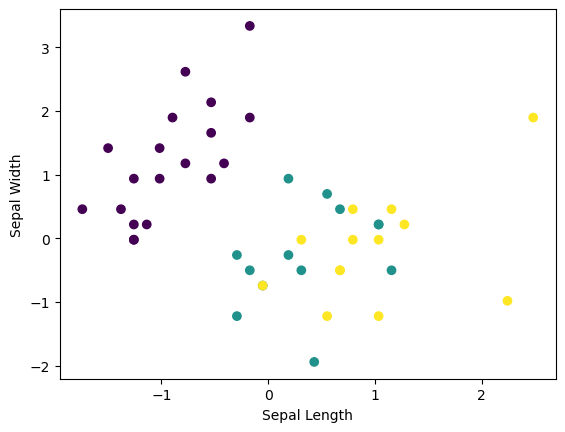

In [18]:
# For example, a scatter plot of sepal length vs. sepal width with colors indicating species
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()


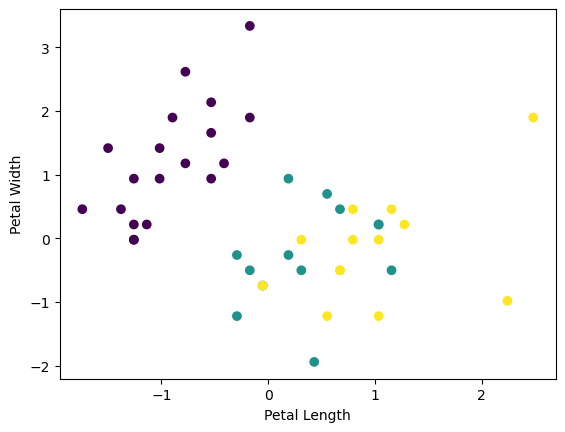

In [20]:
# For example, a scatter plot of petal length vs. petal width with colors indicating species
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()


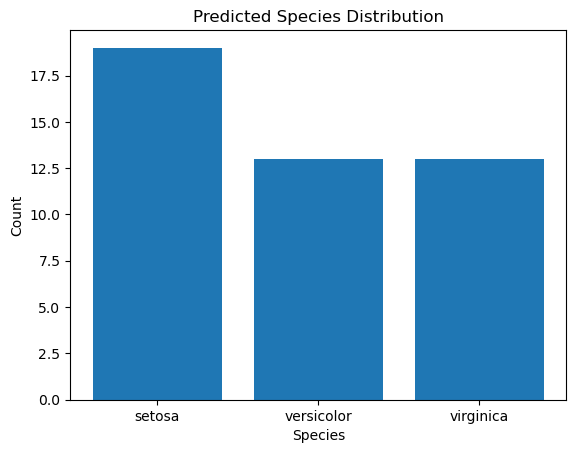

In [25]:


# Count the number of occurrences for each predicted species using bar plot
unique_species, counts = np.unique(y_pred, return_counts=True)

# Convert the unique_species array to integers
unique_species = unique_species.astype(int)

# Create a bar chart
plt.bar(unique_species, counts)
plt.xticks(unique_species, iris.target_names[unique_species])
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Predicted Species Distribution')
plt.show()
